<div style="background-color:#EAF4EC; padding:20px; border-radius:10px;">

<h2 style="color:#2F6F4E; text-align:center; margin-bottom:5px;">
Data Understanding: 
Exploratory Data Analysis (EDA)
</h2>

<h4 style="color:#2F6F4E; text-align:center; margin-top:0;">
Master Thesis – ESG Governance Indicators (EU-27)
</h4>

<p style="font-size:14px; color:#2F6F4E;">
This notebook performs the <strong>Data Understanding / Exploratory Data Analysis (EDA)</strong> step of the CRISP-ML(Q) methodology.<br>
The goal is to obtain a clear overview of the EU-27 Governance dataset before any cleaning or preprocessing.
</p>


<p style="font-size:14px; color:#2F6F4E;">
This notebook does <em>not</em> modify or clean the dataset.<br>
Preprocessing will be done later in <code>03_data_preparation.ipynb</code>.
</p>

</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
from matplotlib.colors import LinearSegmentedColormap

In [2]:
DATA_PATH = Path("../data/processed/esg_gov17_eu27.csv")
df_wide = pd.read_csv(DATA_PATH)

In [3]:
BG = "#EAF4EC"
ACCENT = "#2F6F4E"
TEXT = "#1F2937"

plt.rcParams.update({
    "figure.facecolor": BG,
    "axes.facecolor": BG,
    "axes.edgecolor": TEXT,
    "axes.labelcolor": TEXT,
    "xtick.color": TEXT,
    "ytick.color": TEXT,
    "text.color": TEXT,
    "axes.titleweight": "bold",
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "grid.color": "#CFE3D7",
    "grid.linestyle": "-",
    "grid.linewidth": 0.8,
})

# Green sequential colormap consistent with your palette
GREEN_CMAP = LinearSegmentedColormap.from_list(
    "green_theme",
    [BG, "#BFE3D0", "#6FBF9B", ACCENT]
)

# Diverging colormap for correlations (keeps green as positive side)
CORR_CMAP = LinearSegmentedColormap.from_list(
    "corr_theme",
    ["#8B1E3F", "#F4F5F7", ACCENT]  # negative -> neutral -> positive
)

In [4]:
df_wide.head()

Country Name Country Code                                    Indicator Name  \
0      Austria          AUT                   Control of Corruption: Estimate   
1      Austria          AUT      Economic and Social Rights Performance Score   
2      Austria          AUT                             GDP growth (annual %)   
3      Austria          AUT                Government Effectiveness: Estimate   
4      Austria          AUT  Individuals using the Internet (% of population)   

      Indicator Code  1960      1961      1962      1963      1964      1965  \
0             CC.EST   NaN       NaN       NaN       NaN       NaN       NaN   
1     SD.ESR.PERF.XQ   NaN       NaN       NaN       NaN       NaN       NaN   
2  NY.GDP.MKTP.KD.ZG   NaN  5.537979  2.648675  4.138268  6.124354  3.480175   
3             GE.EST   NaN       NaN       NaN       NaN       NaN       NaN   
4     IT.NET.USER.ZS   NaN       NaN       NaN       NaN       NaN       NaN   

   ...       2014       2015       2016       2017       2018       2019  \
0  ...   1.466502   1.472044   1.496881   1.500820   1.568587   1.521324   
1  ...   2.389795   2.410802   2.407398   2.401373   2.407031        NaN   
2  ...   0.755799   1.303523   2.117220   2.272250   2.484221   1.754976   
3  ...   1.552996   1.450979   1.474811   1.467752   1.456117   1.492126   
4  ...  81.000000  83.900000  84.300000  87.900000  87.500000  87.800000   

        2020       2021       2022       2023  
0   1.477709   1.242727   1.258587   1.133653  
1        NaN        NaN        NaN        NaN  
2  -6.318255   4.795329   5.277894  -0.954963  
3   1.605863   1.528295   1.464923   1.326681  
4  87.500000  92.500000  93.600000  95.300000  

[5 rows x 68 columns]

<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
1. Data Integrity  — Do we have the dataset we expect?
</h2>

**1.1 EU-27 Country Coverage**
- The dataset contains **27 unique country names** and **27 unique country codes**.
- All EU-27 Member States are present, with no missing or extra countries.

In [5]:
unique_countries = df_wide["Country Name"].sort_values().unique()
unique_country_codes = df_wide["Country Code"].sort_values().unique()

print(f"Number of unique country names: {len(unique_countries)}")
print(f"Number of unique country codes: {len(unique_country_codes)}")

print("\nCountry names:")
print(unique_countries)

print("\nCountry codes:")
print(unique_country_codes)

Number of unique country names: 27
Number of unique country codes: 27

Country names:
['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Ireland'
 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands' 'Poland'
 'Portugal' 'Romania' 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden']

Country codes:
['AUT' 'BEL' 'BGR' 'CYP' 'CZE' 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GRC'
 'HRV' 'HUN' 'IRL' 'ITA' 'LTU' 'LUX' 'LVA' 'MLT' 'NLD' 'POL' 'PRT' 'ROU'
 'SVK' 'SVN' 'SWE']


**1.2 Governance Indicators**
- The dataset includes **17 unique governance indicators**, matching the expected set from the World Bank Sovereign ESG Data Portal.
- No unexpected indicators were found.
- Indicator codes map **1-to-1** to indicator names (no inconsistencies).

In [6]:
indicators = df_wide[["Indicator Code", "Indicator Name"]].drop_duplicates()

print(f"Number of unique indicators: {indicators.shape[0]}")
indicators.sort_values("Indicator Code")

Number of unique indicators: 17


Indicator Code                                     Indicator Name
0              CC.EST                    Control of Corruption: Estimate
11  GB.XPD.RSDV.GD.ZS    Research and development expenditure (% of GDP)
3              GE.EST                 Government Effectiveness: Estimate
14     IP.JRN.ARTC.SC          Scientific and technical journal articles
6         IP.PAT.RESD                     Patent applications, residents
4      IT.NET.USER.ZS   Individuals using the Internet (% of population)
2   NY.GDP.MKTP.KD.ZG                              GDP growth (annual %)
7              PV.EST  Political Stability and Absence of Violence/Te...
12             RL.EST                              Rule of Law: Estimate
10             RQ.EST                       Regulatory Quality: Estimate
1      SD.ESR.PERF.XQ       Economic and Social Rights Performance Score
13  SE.ENR.PRSC.FM.ZS  School enrollment, primary and secondary (gros...
8      SG.GEN.PARL.ZS  Proportion of seats held by women in national ...
9   SL.TLF.CACT.FM.ZS  Ratio of female to male labor force participat...
5         SM.POP.NETM                                      Net migration
15        SP.UWT.TFRT  Unmet need for contraception (% of married wom...
16             VA.EST                 Voice and Accountability: Estimate

In [7]:
# Country Code → Country Name mapping
country_name_counts = df_wide.groupby("Country Code")["Country Name"].nunique().sort_values(ascending=False)
print("Number of distinct names per Country Code:")
print(country_name_counts.head(10))

# Indicador Code → Indicator Name mapping
indicator_name_counts = df_wide.groupby("Indicator Code")["Indicator Name"].nunique().sort_values(ascending=False)
print("\nNumber of distinct names per Indicator Code:")
print(indicator_name_counts.head(10))

Number of distinct names per Country Code:
Country Code
AUT    1
IRL    1
SVN    1
SVK    1
ROU    1
PRT    1
POL    1
NLD    1
MLT    1
LVA    1
Name: Country Name, dtype: int64

Number of distinct names per Indicator Code:
Indicator Code
CC.EST               1
RQ.EST               1
SP.UWT.TFRT          1
SM.POP.NETM          1
SL.TLF.CACT.FM.ZS    1
SG.GEN.PARL.ZS       1
SE.ENR.PRSC.FM.ZS    1
SD.ESR.PERF.XQ       1
RL.EST               1
GB.XPD.RSDV.GD.ZS    1
Name: Indicator Name, dtype: int64


In [8]:
dup_mask = df_wide.duplicated(subset=["Country Code", "Indicator Code"], keep=False)
num_duplicates = dup_mask.sum()

print(f"Number of duplicated rows (Country Code + Indicator Code): {num_duplicates}")

if num_duplicates > 0:
    display(df_wide.loc[dup_mask].sort_values(["Country Code", "Indicator Code"]).head(10))


Number of duplicated rows (Country Code + Indicator Code): 0


**1.3 Country and Indicator Consistency**
- Each **Country Code** maps uniquely to a single **Country Name**.
- Each **Indicator Code** maps uniquely to a single **Indicator Name**.
- No duplicated rows were found for any (Country Code, Indicator Code) combination.

<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
2. Temporal Coverage — How is the data distributed over time?
</h2>

**2.1 What years are available in the dataset?**

We identify the full time span covered by the 17 governance indicators.

In [9]:
# Identify columns that correspond to years (wide format)
year_cols = [c for c in df_wide.columns if c.isdigit()]

print("Years detected in dataset:", year_cols[:5], "...", year_cols[-5:])
print(f"Total number of years: {len(year_cols)}")

start_year = min(map(int, year_cols))
end_year = max(map(int, year_cols))

print(f"\nTime span: {start_year} – {end_year}")

Years detected in dataset: ['1960', '1961', '1962', '1963', '1964'] ... ['2019', '2020', '2021', '2022', '2023']
Total number of years: 64

Time span: 1960 – 2023


In [10]:
missing_per_year = df_wide[year_cols].isna().sum()
missing_rate = missing_per_year / df_wide.shape[0]

missing_df = pd.DataFrame({
    "year": year_cols,
    "missing": missing_per_year.values,
    "missing_rate": missing_rate.values
})

missing_df.head()


year  missing  missing_rate
0  1960      432      0.941176
1  1961      417      0.908497
2  1962      417      0.908497
3  1963      417      0.908497
4  1964      417      0.908497

**2.2 Do some years suffer from extensive missing values?**
We measure missingness per year to detect:
- early years with poor coverage,
- periods with incomplete reporting,
- potential structural breaks.

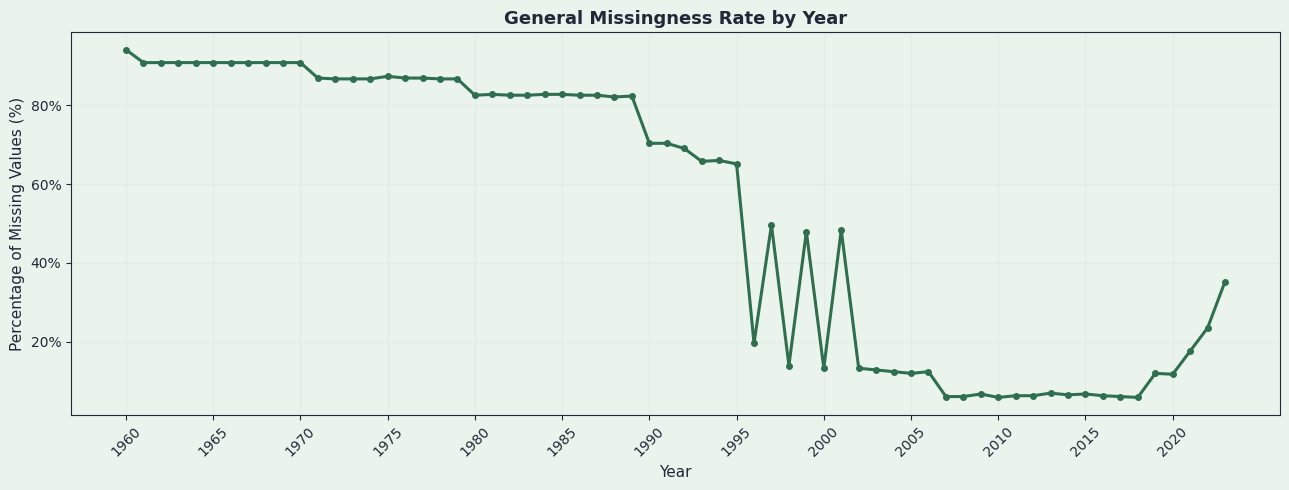

In [11]:
import matplotlib.ticker as mtick

# Ensure year is numeric and sorted
missing_df["year"] = missing_df["year"].astype(int)
missing_df = missing_df.sort_values("year")

fig, ax = plt.subplots(figsize=(13, 5))

ax.plot(
    missing_df["year"],
    missing_df["missing_rate"] * 100,
    marker="o",
    linewidth=2.2,
    markersize=4,
    color=ACCENT
)

ax.set_title("General Missingness Rate by Year", fontsize=13)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Missing Values (%)")

# X-axis: show every 5 years
ax.set_xticks(missing_df["year"][::5])
ax.tick_params(axis="x", rotation=45)

# Y-axis: percentage formatting
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



 **2.3 Has data coverage improved over time?**
We calculate the share of available data per year and visualise it to detect:
- progressive improvement in the 2000s,
- stabilisation periods,
- years to potentially exclude from the analysis.

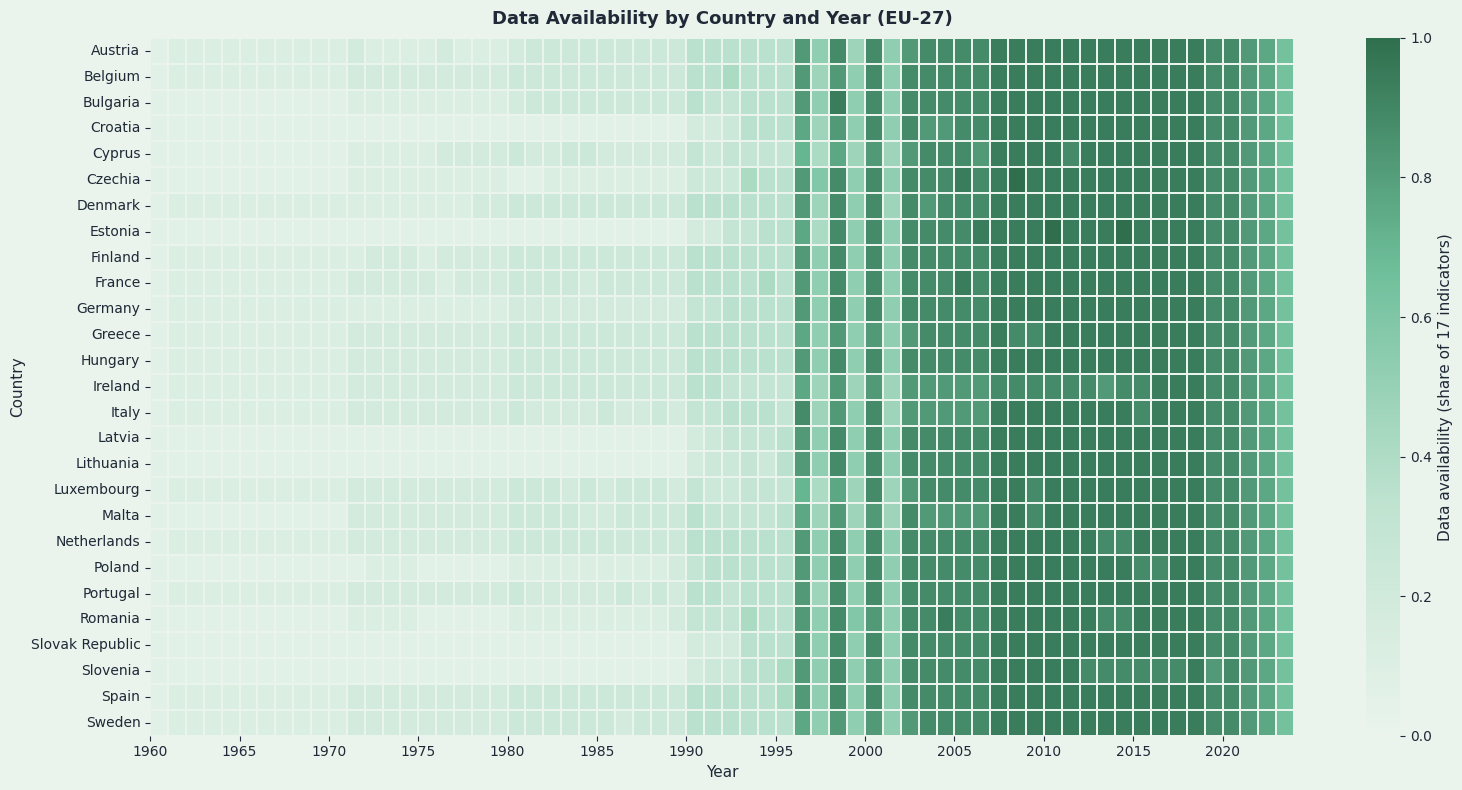

In [12]:
availability_share = (
    df_wide.groupby("Country Name")[year_cols]
    .apply(lambda x: x.notna().mean())
)

fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(
    availability_share,
    cmap=GREEN_CMAP,
    vmin=0, vmax=1,
    linewidths=0.15,
    linecolor=BG,
    cbar_kws={"label": "Data availability (share of 17 indicators)"},
    ax=ax
)

ax.set_title("Data Availability by Country and Year (EU-27)", fontsize=13, pad=10)
ax.set_xlabel("Year")
ax.set_ylabel("Country")

# Make years readable (every 5 years)
step = 5  
ax.set_xticks(range(0, len(year_cols), step))
ax.set_xticklabels([year_cols[i] for i in range(0, len(year_cols), step)], rotation=0)

plt.tight_layout()
plt.show()


<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
3. Indicator Quality — Which indicators have the most issues?
</h2>

In [13]:
# Convert df_wide into long format for indicator-level analysis
year_cols = [c for c in df_wide.columns if c.isdigit()]

df_long = df_wide.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    value_vars=year_cols,
    var_name="year",
    value_name="value"
)

df_long["year"] = pd.to_numeric(df_long["year"], errors="coerce")
df_long["value"] = pd.to_numeric(df_long["value"], errors="coerce")

print("Long-format table for Indicator Quality analysis:", df_long.shape)
df_long.head()

Long-format table for Indicator Quality analysis: (29376, 6)


Country Name Country Code                                    Indicator Name  \
0      Austria          AUT                   Control of Corruption: Estimate   
1      Austria          AUT      Economic and Social Rights Performance Score   
2      Austria          AUT                             GDP growth (annual %)   
3      Austria          AUT                Government Effectiveness: Estimate   
4      Austria          AUT  Individuals using the Internet (% of population)   

      Indicator Code  year  value  
0             CC.EST  1960    NaN  
1     SD.ESR.PERF.XQ  1960    NaN  
2  NY.GDP.MKTP.KD.ZG  1960    NaN  
3             GE.EST  1960    NaN  
4     IT.NET.USER.ZS  1960    NaN

In [14]:
missing_by_indicator = (
    df_long.assign(is_missing=df_long["value"].isna())
           .groupby("Indicator Code")["is_missing"]
           .mean()
           .sort_values(ascending=False)
)

print("Missingness by indicator (%):")
display((missing_by_indicator * 100).round(1))

Missingness by indicator (%):


Indicator Code
SP.UWT.TFRT          98.8
SD.ESR.PERF.XQ       81.2
CC.EST               60.9
PV.EST               60.9
RQ.EST               60.9
RL.EST               60.9
GE.EST               60.9
VA.EST               60.9
GB.XPD.RSDV.GD.ZS    59.4
SG.GEN.PARL.ZS       58.2
IP.JRN.ARTC.SC       57.8
IT.NET.USER.ZS       48.6
SL.TLF.CACT.FM.ZS    46.9
IP.PAT.RESD          44.0
SE.ENR.PRSC.FM.ZS    35.8
NY.GDP.MKTP.KD.ZG    19.8
SM.POP.NETM           0.0
Name: is_missing, dtype: float64

In [16]:
# Percentagem de missing por indicador
missing_by_indicator = (
    df_long.groupby("Indicator Code")[year_cols]
      .apply(lambda x: x.isna().mean().mean() * 100)
      .sort_values(ascending=False)
)


KeyError: "Columns not found: '2022', '1994', '2010', '2021', '1985', '1984', '1980', '2003', '2016', '2012', '1995', '1968', '1986', '2004', '1989', '2000', '1966', '1969', '2019', '1963', '1975', '2015', '1960', '2018', '1965', '1977', '2014', '1982', '2008', '1974', '1961', '1997', '1987', '2009', '1979', '1976', '1970', '1991', '2001', '1964', '1983', '1990', '2017', '2023', '1978', '1988', '1999', '2011', '2007', '1993', '1973', '2002', '2005', '2020', '1996', '1962', '1998', '1967', '1971', '1992', '2006', '2013', '1972', '1981'"

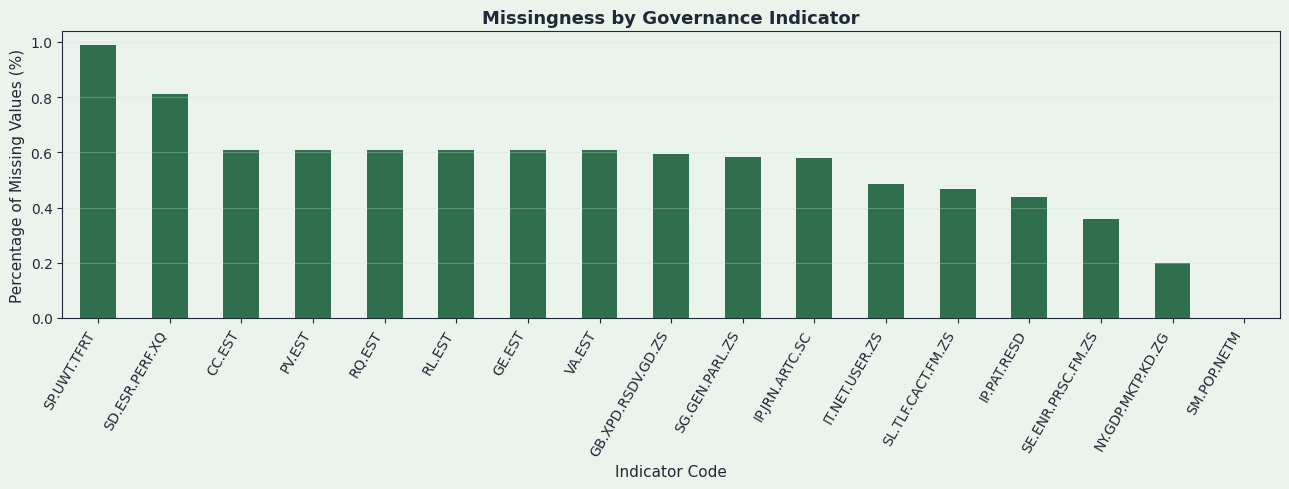

In [37]:
fig, ax = plt.subplots(figsize=(13, 5))

missing_by_indicator.plot(
    kind="bar",
    color=ACCENT,
    ax=ax
)

ax.set_title("Missingness by Governance Indicator", fontsize=13)
ax.set_xlabel("Indicator Code")
ax.set_ylabel("Percentage of Missing Values (%)")

# Fix x-axis labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    ha="right"
)

ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()



In [17]:
def robust_z(x):
    med = np.nanmedian(x)
    mad = np.nanmedian(np.abs(x - med)) + 1e-9
    return 0.6745 * (x - med) / mad

df_long["robust_z"] = df_long.groupby("Indicator Code")["value"].transform(robust_z)

outliers = df_long[np.abs(df_long["robust_z"]) >= 3]

print("Number of extreme outliers (|z| ≥ 3):", outliers.shape[0])
outliers.head()


Number of extreme outliers (|z| ≥ 3): 670


Country Name Country Code Indicator Name Indicator Code  year     value  \
158       France          FRA  Net migration    SM.POP.NETM  1960  143032.0   
175      Germany          DEU  Net migration    SM.POP.NETM  1960  212666.0   
243        Italy          ITA  Net migration    SM.POP.NETM  1960 -140765.0   
362     Portugal          PRT  Net migration    SM.POP.NETM  1960  -95886.0   
379      Romania          ROU  Net migration    SM.POP.NETM  1960  -55397.0   

      robust_z  
158   7.335687  
175  11.023657  
243  -7.694824  
362  -5.317934  
379  -3.173548

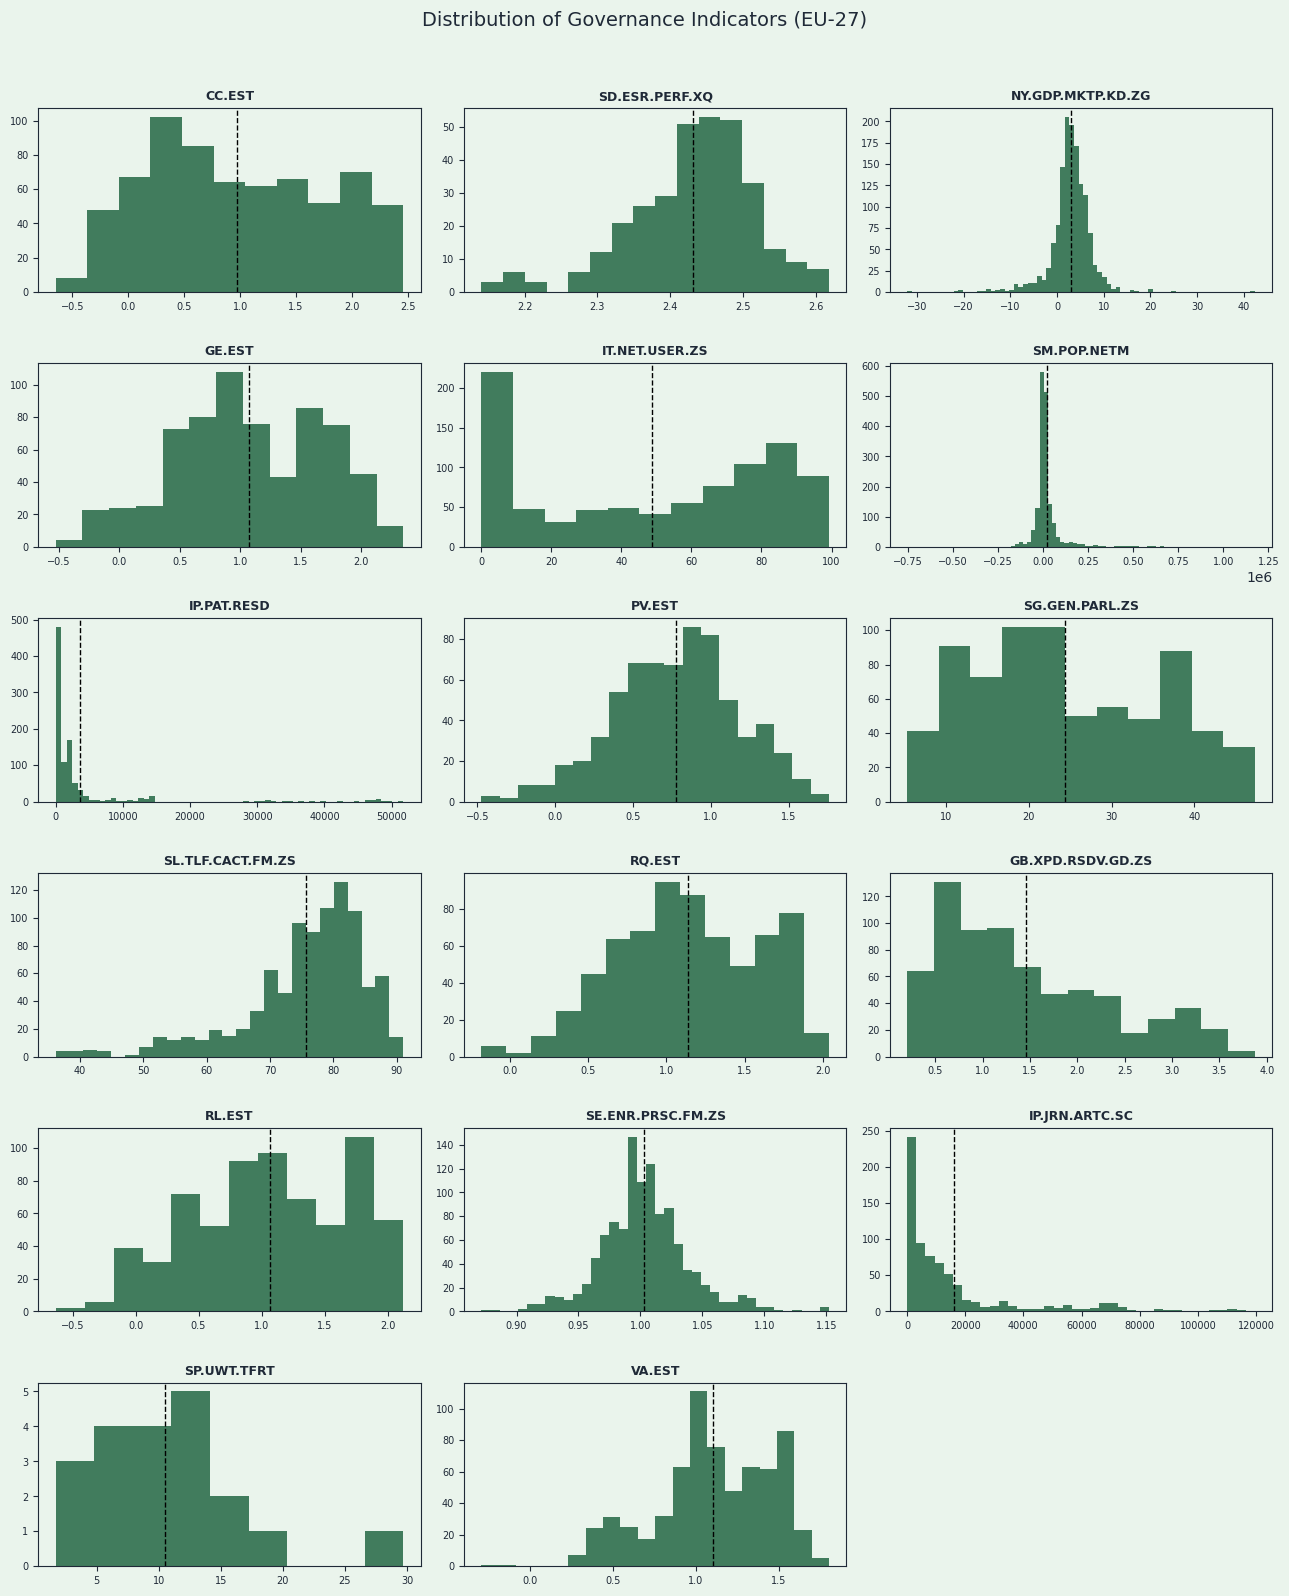

In [18]:
unique_inds = df_long["Indicator Code"].unique()
n = len(unique_inds)

cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(13, rows * 2.6))
axes = axes.flatten()

for i, ind in enumerate(unique_inds):
    subset = df_long.loc[
        df_long["Indicator Code"] == ind, "value"
    ].dropna()

    axes[i].hist(
        subset,
        bins="auto",
        color=ACCENT,
        alpha=0.9
    )

    # Mean line
    axes[i].axvline(
        subset.mean(),
        color="black",
        linestyle="--",
        linewidth=1
    )

    axes[i].set_title(ind, fontsize=9)
    axes[i].tick_params(axis="both", labelsize=7)

    # Remove y-label clutter
    axes[i].set_ylabel("")
    axes[i].grid(False)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

fig.suptitle(
    "Distribution of Governance Indicators (EU-27)",
    fontsize=14,
    y=1.02
)

plt.tight_layout()
plt.show()


- The indicators display **heterogeneous distributional shapes**, reflecting differences in scale, reporting practices, and structural country characteristics.  
- Several governance indicators (e.g., **CC.EST**, **GE.EST**, **RQ.EST**, **RL.EST**, **PV.EST**) show **fairly symmetric or mildly skewed distributions**, suggesting stable reporting across countries and time.
- Some indicators exhibit **strong skewness and heavy tails**, particularly:
  - **SM.POP.NETM** (Net migration): extremely high variance and large outliers, especially in earlier decades.
  - **IP.PAT.RESD** and **IP.JRN.ARTC.SC**: right-tailed distributions driven by high-performing innovation economies.
  - **NY.GDP.MKTP.KD.ZG**: asymmetric behaviour reflecting economic expansions and recessions.
- A few indicators show **multimodal distributions**, indicating structural differences between Western and Eastern EU member states.
- These distributional patterns confirm the need for **scaling/normalisation** prior to modelling and clustering.
- Outliers identified through robust z-scores (|z| ≥ 3) mainly affect indicators with naturally high variability (e.g., migration, innovation output), and likely reflect **true economic or demographic events**, not errors.

<div style="background-color:#EAF4EC; padding:16px; border-radius:10px;">

<h2 style="color:#2F6F4E; margin-bottom:5px; font-size:20px;">
4. Latent Structure — Are there hidden patterns or natural clusters?
</h2>

In [19]:
# Pivot: rows = country, columns = indicator, values = mean over available years
pivot = (
    df_long
    .groupby(["Country Code", "Indicator Code"])["value"]
    .mean()
    .unstack("Indicator Code")
)

print("Country–indicator matrix shape:", pivot.shape)
pivot.head()

Country–indicator matrix shape: (27, 17)


Indicator Code    CC.EST  GB.XPD.RSDV.GD.ZS    GE.EST  IP.JRN.ARTC.SC  \
Country Code                                                            
AUT             1.628059           2.551012  1.648371    10423.043333   
BEL             1.433782           2.269293  1.519270    13836.461481   
BGR            -0.208215           0.594413 -0.018493     2602.598148   
CYP             0.895646           0.454930  1.135167      693.830370   
CZE             0.460191           1.458684  0.916649    10864.789630   

Indicator Code  IP.PAT.RESD  IT.NET.USER.ZS  NY.GDP.MKTP.KD.ZG    PV.EST  \
Country Code                                                               
AUT             2135.785714       52.929912           2.629148  1.082411   
BEL              721.452381       52.609062           2.583450  0.755828   
BGR              641.023810       34.271776           1.851993  0.289915   
CYP                5.400000       43.038500           4.941588  0.476573   
CZE              709.103448       46.486281           1.847082  0.947504   

Indicator Code    RL.EST    RQ.EST  SD.ESR.PERF.XQ  SE.ENR.PRSC.FM.ZS  \
Country Code                                                            
AUT             1.824746  1.478954        2.379391           0.956962   
BEL             1.352460  1.265565        2.458279           1.040585   
BGR            -0.117440  0.523768        2.319482           0.984537   
CYP             0.919020  1.111882        2.489035           1.001484   
CZE             0.961680  1.138330        2.435670           1.019735   

Indicator Code  SG.GEN.PARL.ZS  SL.TLF.CACT.FM.ZS   SM.POP.NETM  SP.UWT.TFRT  \
Country Code                                                                   
AUT                  32.327869          76.311700  25645.578125          NaN   
BEL                  34.246914          74.571142  26334.921875         3.40   
BGR                  21.435185          81.144924 -15878.281250        29.70   
CYP                  12.830688          74.151869   4874.781250          NaN   
CZE                  19.092593          74.245474   9670.078125         9.45   

Indicator Code    VA.EST  
Country Code              
AUT             1.387998  
BEL             1.356918  
BGR             0.450525  
CYP             1.009746  
CZE             0.976315

In [20]:
# Selecionar apenas colunas de anos
year_cols = [c for c in df_wide.columns if c.isdigit()]

# Média EU-27 por indicador e ano
indicator_year = (
    df_wide
    .groupby("Indicator Code")[year_cols]
    .mean()
)


In [21]:
corr = indicator_year.T.corr(method="pearson")


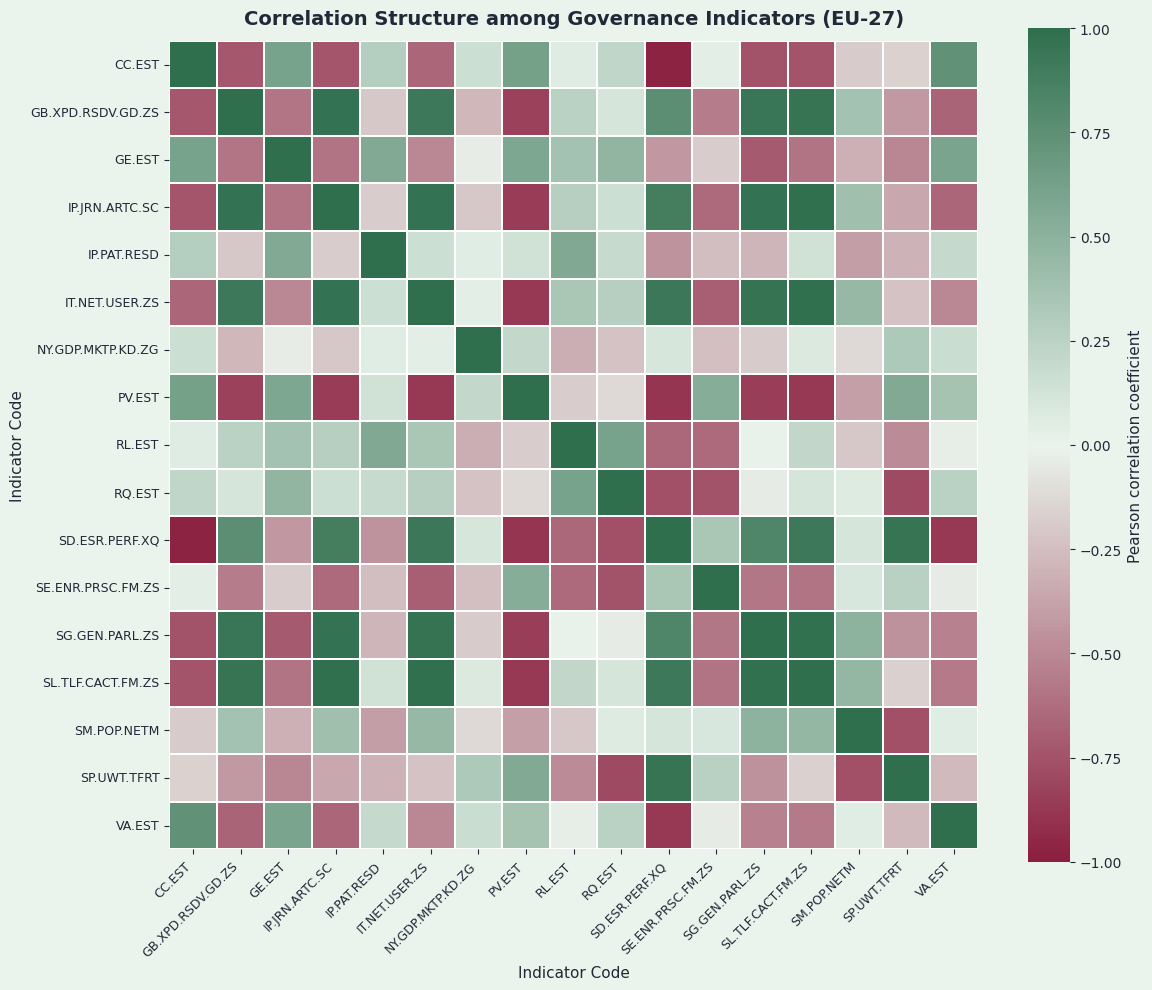

In [22]:
custom_cmap = LinearSegmentedColormap.from_list(
    "gov_corr",
    ["#8B1E3F", "#EAF4EC", "#2F6F4E"],  # negative, zero, positive
    N=256
)

plt.figure(figsize=(12, 10))

sns.heatmap(
    corr,
    cmap=custom_cmap,
    vmin=-1, vmax=1,
    center=0,
    square=True,
    linewidths=0.3,
    cbar_kws={"label": "Pearson correlation coefficient"}
)

plt.title(
    "Correlation Structure among Governance Indicators (EU-27)",
    fontsize=14,
    pad=12
)

plt.xlabel("Indicator Code")
plt.ylabel("Indicator Code")

plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()